# Projeto end-to-end de Ciência de Dados

  Neste projeto vamos resolver o problema de uma empresa de seguros, para isso faremos todas as etapas do processo de desenvolvimento de um modelo seguindo a metodologia CRISP-DM.

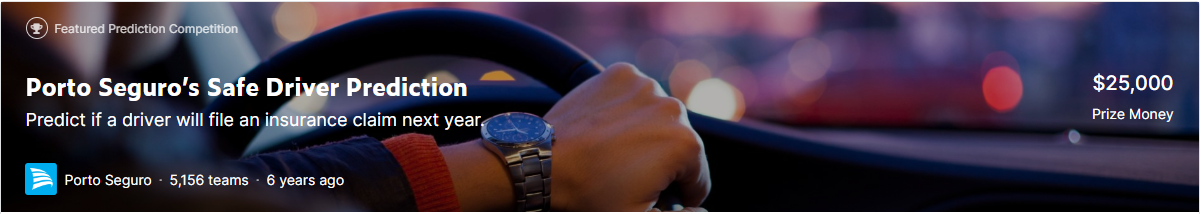

### **Introdução**

Nada desanima mais rapidamente após comprar um carro novo do que ver a conta do novo seguro. É ainda mais frustrante quando você sabe que é um bom motorista. Parece injusto pagar tanto quando se é cuidadoso ao dirigir por anos. A Porto Seguro, uma das maiores seguradoras de automóveis e residências do Brasil, concorda plenamente. Imprecisões nas previsões de sinistros de seguradoras elevam o custo para bons motoristas e diminuem para os ruins. Nesta competição, o desafio é construir um modelo que preveja a probabilidade de um motorista fazer um sinistro de seguro auto no próximo ano. Embora a Porto Seguro use aprendizado de máquina há 20 anos, eles buscam novos métodos através da comunidade de aprendizado de máquina do Kaggle. Uma previsão mais precisa permitirá ajustar melhor seus preços, tornando o seguro automotivo mais acessível a mais motoristas.

### **Avaliação do Modelo (Sugerido pelo Cliente)**
Métrica de Pontuação
As submissões são avaliadas usando o **Coeficiente Gini Normalizado**.

O Coeficiente Gini Normalizado ajusta a pontuação pelo máximo teórico, de modo que a pontuação máxima é 1.
___

# 1) Entendimento do problema de Negócio
   Construir um **modelo que preveja a probabilidade de um motorista fazer um sinistro de seguro auto no próximo ano**

**"Sinistro"** é um termo usado no setor de seguros para se referir a um evento em que o segurado sofre um prejuízo coberto pela sua apólice e, consequentemente, faz uma reclamação ou solicitação de indenização à seguradora. No contexto de seguro auto, um sinistro pode envolver situações como:

1. Acidentes de trânsito (colisões, capotagens, etc.);
2. Roubo ou furto do veículo;
3. Danos causados por fenômenos naturais (enchentes, granizo, etc.);
4. Danos causados por terceiros (vandalismo, por exemplo);
5. Entre outros.

Após a ocorrência de um sinistro, o segurado deve entrar em contato com a seguradora para informar o ocorrido e iniciar o processo de avaliação e eventual indenização, conforme estabelecido na apólice de seguro.   

# 2) Entendimento dos Dados

Para este projeto utilizaremos os dados disponibilizados pela seguradora Porto Seguro no ambiente Kaggle:

https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data

Nos dados de treino e teste:
- variáveis que pertencem a agrupamentos similares são marcadas como tal nos nomes das variáveis (por exemplo, ind, reg, car, calc).

- Os nomes das variáveis incluem o sufixo "bin" para indicar variáveis binárias e "cat" para indicar varipaveis categóricas. Variáveis sem essas designações são contínuas ou ordinais.

- Valores de -1 indicam nulo.

- A coluna "target" indica se uma reclamação (sinistro) foi feita ou não para aquele titular da apólice.

O arquivo train.csv contém os dados de treino, onde cada linha corresponde a um titular de apólice, e a coluna "target" indica que uma reclamação foi feita.
O arquivo test.csv contém os dados de teste.



# Preparação dos Dados
- Gerar Metadados da ABT (Tabela Analítica de Modelagem)
- Tratamento de missing (nulos)
- Tratamento de categóricas de alta cardinalidade (LabelEncoder)
- Tratamento de categóricas de baixa cardinalidade (OneHotEncoder)
- Aplicar normalização a toda tabela de modelagem (ABT)
- Gerar artefatos para implantação do data prep realizado

#### Funções utilizadas no projeto

#### Bibliotecas que serão utilizadas no projeto

- pod_academy_functions é a nossa biblioteca criada no curso de DS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import pod_academy_functions as pod

-----------------------------------------------------
------------ PoD Academy Functions ------------------
Só Alegria!
Você está usando o pacote de funções da PoD Academy
Turma: 2023
Autor: PoD Academy
Professor: Bruno Jardim
Versão: 1.0.0
Data: 08/10/2023
-----------------------------------------------------


#### Lendo os dados disponibilizados

In [2]:
df_train_00 = pd.read_csv('train.csv')
df_train_00.shape

(595212, 59)

In [3]:
df_train_00_sample = df_train_00.sample(n=10000)
df_train_00_sample.shape

(10000, 59)

In [4]:
df_test_00 = pd.read_csv('test.csv')
df_test_00.shape

(892816, 58)

#### Separando dados para garantir validação cruzada Holdout 70/30

In [5]:
# Suponha que você queira separar 70% dos dados para treino e 30% para validação
train, test = train_test_split(df_train_00, test_size=0.3, random_state=42)
train.shape,test.shape

((416648, 59), (178564, 59))

In [6]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
391389,977816,0,7,1,9,1,0,0,0,1,...,5,2,4,10,0,1,1,0,0,1
518243,1294939,0,5,1,3,1,0,0,1,0,...,3,1,6,12,0,1,1,0,1,0
136933,342083,0,0,1,6,1,0,1,0,0,...,4,3,4,10,0,0,1,0,1,0
432345,1080386,0,0,1,4,1,0,1,0,0,...,5,3,4,8,0,0,1,0,1,0
127021,317567,1,1,1,2,0,0,0,0,0,...,8,1,4,5,0,1,1,1,1,0


#### Substituir o valor -1 de todas as variáveis para missing (nulo)
- Agora precisamos lembrar de incluir esta etapa para ser executada no código de escoragem (produção)

In [7]:
# Substituindo -1 por 'missing' em todo o dataframe
# Criando um novo dataframe baseado no original
df_train_01 = train.copy()

df_train_01.replace(-1, np.nan, inplace=True)

In [8]:
df_train_01.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
391389,977816,0,7,1.0,9,1.0,0.0,0,0,1,...,5,2,4,10,0,1,1,0,0,1
518243,1294939,0,5,1.0,3,1.0,0.0,0,1,0,...,3,1,6,12,0,1,1,0,1,0
136933,342083,0,0,1.0,6,1.0,0.0,1,0,0,...,4,3,4,10,0,0,1,0,1,0
432345,1080386,0,0,1.0,4,1.0,0.0,1,0,0,...,5,3,4,8,0,0,1,0,1,0
127021,317567,1,1,1.0,2,0.0,0.0,0,0,0,...,8,1,4,5,0,1,1,1,1,0


In [9]:
metadados = pod.pod_academy_generate_metadata(df_train_01,
                                          ids=['id'],
                                          targets=['target'],
                                          orderby = 'PC_NULOS')

metadados.head(10)

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,ps_car_03_cat,Explicativa,287957,69.11,2,float64
1,ps_car_05_cat,Explicativa,186779,44.83,2,float64
2,ps_reg_03,Explicativa,75228,18.06,4965,float64
3,ps_car_14,Explicativa,29746,7.14,831,float64
4,ps_car_07_cat,Explicativa,8018,1.92,2,float64
5,ps_ind_05_cat,Explicativa,4057,0.97,7,float64
6,ps_car_09_cat,Explicativa,393,0.09,5,float64
7,ps_ind_02_cat,Explicativa,139,0.03,4,float64
8,ps_car_01_cat,Explicativa,69,0.02,12,float64
9,ps_ind_04_cat,Explicativa,55,0.01,2,float64


#### Excluindo variáveis com mais que 68% de nulos

In [10]:
missing_cutoff = 68

drop_vars_nulos = metadados[(metadados['PC_NULOS'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.FEATURE.values)

print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_vars)
# retirando lista de variáveis com alto percentual de nulos
df_train_02 = df_train_01.drop(axis=1,columns=lista_drop_vars)
df_train_02.shape

Variáveis que serão excluídas por alto percentual de nulos:  ['ps_car_03_cat']


(416648, 58)

In [11]:
# Salvar a lista em um arquivo .pkl
with open('prd_drop_nullvars_a014.pkl', 'wb') as f:
    pickle.dump(lista_drop_vars, f)

In [12]:
df_train_02.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
391389,977816,0,7,1.0,9,1.0,0.0,0,0,1,...,5,2,4,10,0,1,1,0,0,1
518243,1294939,0,5,1.0,3,1.0,0.0,0,1,0,...,3,1,6,12,0,1,1,0,1,0
136933,342083,0,0,1.0,6,1.0,0.0,1,0,0,...,4,3,4,10,0,0,1,0,1,0
432345,1080386,0,0,1.0,4,1.0,0.0,1,0,0,...,5,3,4,8,0,0,1,0,1,0
127021,317567,1,1,1.0,2,0.0,0.0,0,0,0,...,8,1,4,5,0,1,1,1,1,0


In [13]:
# Retirar ID e Target do tratamento de nulos

df_train_02 = df_train_02.drop(axis=1, columns=['id', 'target'])
df_train_02.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
391389,7,1.0,9,1.0,0.0,0,0,1,0,0,...,5,2,4,10,0,1,1,0,0,1
518243,5,1.0,3,1.0,0.0,0,1,0,0,0,...,3,1,6,12,0,1,1,0,1,0
136933,0,1.0,6,1.0,0.0,1,0,0,0,0,...,4,3,4,10,0,0,1,0,1,0
432345,0,1.0,4,1.0,0.0,1,0,0,0,0,...,5,3,4,8,0,0,1,0,1,0
127021,1,1.0,2,0.0,0.0,0,0,0,1,0,...,8,1,4,5,0,1,1,1,1,0


#### Substituindo os nulos
- pela média para variáveis numéricas
- por 'MISS_VERIFICAR" para categóricas

In [15]:
df_train_03, means = pod.pod_custom_fillna(df_train_02)

with open('prd_fillna_a014.pkl', 'wb') as f:
  pickle.dump(means, f)

In [16]:
with open('prd_fillna_a014.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means

{'ps_ind_01': 1.902154816535781,
 'ps_ind_02_cat': 1.3595696611597827,
 'ps_ind_03': 4.4241902037211265,
 'ps_ind_04_cat': 0.41688410510978346,
 'ps_ind_05_cat': 0.4189960517800921,
 'ps_ind_06_bin': 0.39382644342466544,
 'ps_ind_07_bin': 0.2568019047253317,
 'ps_ind_08_bin': 0.16375453620322192,
 'ps_ind_09_bin': 0.185617115646781,
 'ps_ind_10_bin': 0.0003672164512970181,
 'ps_ind_11_bin': 0.0016608744071734413,
 'ps_ind_12_bin': 0.009283615905992589,
 'ps_ind_13_bin': 0.0009048405368560511,
 'ps_ind_14': 0.0122165473013191,
 'ps_ind_15': 7.298587776732398,
 'ps_ind_16_bin': 0.6603967857760028,
 'ps_ind_17_bin': 0.1215630460244619,
 'ps_ind_18_bin': 0.15339567212611124,
 'ps_reg_01': 0.6111741806032911,
 'ps_reg_02': 0.43951201013805413,
 'ps_reg_03': 0.8943857761820007,
 'ps_car_01_cat': 8.297888275693207,
 'ps_car_02_cat': 0.8304171886925592,
 'ps_car_04_cat': 0.7271941782991878,
 'ps_car_05_cat': 0.5257559740547877,
 'ps_car_06_cat': 6.554612046619688,
 'ps_car_07_cat': 0.947840344

In [17]:
test_prod = pod.pod_custom_fillna_prod(test,loaded_means)
test_prod.shape

(178564, 59)

In [18]:
test_prod.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
256886,642026,0,4,1.0,5,1.0,0.0,1,0,0,...,7,3,2,3,0,1,0,1,0,0
118785,297043,0,6,2.0,10,1.0,0.0,0,0,0,...,6,3,3,5,0,1,1,0,0,0
56083,140591,0,4,1.0,9,1.0,0.0,0,0,1,...,3,1,0,7,0,0,1,0,0,0
542002,1354540,0,0,1.0,7,1.0,4.0,0,1,0,...,1,1,3,6,1,1,0,0,0,0
349518,873173,0,1,1.0,3,1.0,0.0,1,0,0,...,6,1,5,6,0,1,0,0,0,0


#### Tratamento de categóricas de alta cardinalidade (LabelEncoder)

In [19]:
card_cutoff = 20
df_categ_labelenc = metadados[(metadados['CARDINALIDADE'] > card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_vars_abt = list(df_train_03.columns)
lista_lenc = list(df_categ_labelenc.FEATURE.values)

for item in lista_drop_vars:
    if item in lista_lenc:
        lista_lenc.remove(item)

print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  []


In [20]:
import pickle
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in lista_lenc:
    encoder = LabelEncoder()
    df_train_03[col] = encoder.fit_transform(df_train_03[col])

    # Armazena o encoder para a coluna atual em um dicionário
    encoders[col] = encoder

# Salva o dicionário de encoders e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('prd_labelenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

In [21]:
# Carregar os encoders e a lista de colunas
with open('prd_labelenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado
        test[col] = loaded_encoders[col].transform(test[col])


In [22]:
test.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
256886,642026,0,4,1.0,5,1.0,0.0,1,0,0,...,7,3,2,3,0,1,0,1,0,0
118785,297043,0,6,2.0,10,1.0,0.0,0,0,0,...,6,3,3,5,0,1,1,0,0,0
56083,140591,0,4,1.0,9,1.0,0.0,0,0,1,...,3,1,0,7,0,0,1,0,0,0
542002,1354540,0,0,1.0,7,1.0,4.0,0,1,0,...,1,1,3,6,1,1,0,0,0,0
349518,873173,0,1,1.0,3,1.0,0.0,1,0,0,...,6,1,5,6,0,1,0,0,0,0


#### Tratamento para categóricas de baixa cardinalidade

In [24]:
import pickle
from sklearn.preprocessing import OneHotEncoder

card_cutoff = 2
df_categ_onehot = metadados[(metadados['CARDINALIDADE'] <= card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_onehot = list(df_categ_onehot.FEATURE.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(df_train_03[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_train_03.index)

df_train_03 = pd.concat([df_train_03.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('prd_onehotenc_a014.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)


Lista de vars para OneHot Encoding:  []


In [25]:
# Carregar o encoder e a lista de colunas
with open('prd_onehotenc_a014.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Suponha test_df como sua base de teste
encoded_data_test = loaded_encoder.transform(test[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=test.index)

test = pd.concat([test.drop(loaded_columns, axis=1), encoded_df_test], axis=1)


#### Aplicar normalização a toda tabela de modelagem tratada ate este ponto

In [26]:
import pickle
from sklearn.preprocessing import StandardScaler

# Excluindo IDs e Targets
df_id_target = metadados[(metadados['USO_FEATURE'] == 'ID') | (metadados['USO_FEATURE'] == 'Target')]
lista_id_target = list(df_id_target.FEATURE.values)
print('Lista de IDs e Target: ',lista_id_target)

# Instanciando o scaler
scaler = StandardScaler()

# Padronizando a base de treino
df_train_03_scaled = scaler.fit_transform(df_train_03)
df_train_04 = pd.DataFrame(df_train_03_scaled, columns=df_train_03.columns, index=df_train_03.index)

# Salva o scaler em um arquivo .pkl
with open('prd_scaler_a014.pkl', 'wb') as f:
    pickle.dump(scaler, f)


Lista de IDs e Target:  ['id', 'target']


In [27]:
df_train_04.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
391389,2.568989,-0.542601,1.695565,1.182765,-0.31183,-0.806035,-0.587823,2.259801,-0.477413,-0.019166,...,-0.189128,0.464250,0.665396,0.896386,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925
518243,1.561116,-0.542601,-0.527733,1.182765,-0.31183,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,-1.045842,-0.367316,1.845816,1.624615,-0.373426,0.770766,0.897048,-0.634586,1.368416,-0.425364
136933,-0.958565,-0.542601,0.583916,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,-0.617485,1.295816,0.665396,0.896386,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364
432345,-0.958565,-0.542601,-0.157184,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,-0.189128,1.295816,0.665396,0.168156,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364
127021,-0.454629,-0.542601,-0.898283,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,1.095943,-0.367316,0.665396,-0.924188,-0.373426,0.770766,0.897048,1.575831,1.368416,-0.425364


In [28]:
# colunas que foram retiradas da tabela:

list_columns_drop = ['id','target','ps_car_03_cat']
df_test_aux = test.drop(axis=1,columns=list_columns_drop)

In [29]:
# Carregar o scaler
with open('prd_scaler_a014.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Suponha test_df como sua base de teste
test_df_scaled = loaded_scaler.transform(df_test_aux)
test_df = pd.DataFrame(test_df_scaled, columns=df_test_aux.columns, index=df_test_aux.index)
test_df.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
256886,1.057180,-0.542601,0.213366,1.182765,-0.311830,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,0.667586,1.295816,-0.515024,-1.652418,-0.373426,0.770766,-1.114768,1.575831,-0.730772,-0.425364
118785,2.065053,0.966428,2.066114,1.182765,-0.311830,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,0.239229,1.295816,0.075186,-0.924188,-0.373426,0.770766,0.897048,-0.634586,-0.730772,-0.425364
56083,1.057180,-0.542601,1.695565,1.182765,-0.311830,-0.806035,-0.587823,2.259801,-0.477413,-0.019166,...,-1.045842,-0.367316,-1.695444,-0.195959,-0.373426,-1.297410,0.897048,-0.634586,-0.730772,-0.425364
542002,-0.958565,-0.542601,0.954465,1.182765,2.665092,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,-1.902556,-0.367316,0.075186,-0.560074,2.677904,0.770766,-1.114768,-0.634586,-0.730772,-0.425364
349518,-0.454629,-0.542601,-0.527733,1.182765,-0.311830,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,0.239229,-0.367316,1.255606,-0.560074,-0.373426,0.770766,-1.114768,-0.634586,-0.730772,-0.425364


In [30]:
test.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
256886,642026,0,4,1.0,5,1.0,0.0,1,0,0,...,7,3,2,3,0,1,0,1,0,0
118785,297043,0,6,2.0,10,1.0,0.0,0,0,0,...,6,3,3,5,0,1,1,0,0,0
56083,140591,0,4,1.0,9,1.0,0.0,0,0,1,...,3,1,0,7,0,0,1,0,0,0
542002,1354540,0,0,1.0,7,1.0,4.0,0,1,0,...,1,1,3,6,1,1,0,0,0,0
349518,873173,0,1,1.0,3,1.0,0.0,1,0,0,...,6,1,5,6,0,1,0,0,0,0


In [31]:
#### Trazer o id e target para a tabela pós dataprep

abt_train = df_train_04.merge(train[['id','target']], left_index=True, right_index=True, how='inner')
abt_test = test_df.merge(test[['id','target']], left_index=True, right_index=True, how='inner')



In [32]:
abt_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,id,target
391389,2.568989,-0.542601,1.695565,1.182765,-0.31183,-0.806035,-0.587823,2.259801,-0.477413,-0.019166,...,0.665396,0.896386,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925,977816,0
518243,1.561116,-0.542601,-0.527733,1.182765,-0.31183,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,1.845816,1.624615,-0.373426,0.770766,0.897048,-0.634586,1.368416,-0.425364,1294939,0
136933,-0.958565,-0.542601,0.583916,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,0.665396,0.896386,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,342083,0
432345,-0.958565,-0.542601,-0.157184,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,0.665396,0.168156,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,1080386,0
127021,-0.454629,-0.542601,-0.898283,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,0.665396,-0.924188,-0.373426,0.770766,0.897048,1.575831,1.368416,-0.425364,317567,1


In [33]:
abt_train.shape

(416648, 58)

#### Salvando tabelas de treino e teste pós preparação dos dados

In [34]:
abt_train.to_csv('abt_train.csv')
abt_test.to_csv('abt_test.csv')